In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
import os
print(os.listdir('/TMP/COVID'))

['CT_COVID', 'CT_NonCOVID']


In [4]:
X=[]
Z=[]
IMG_SIZE=150

COVID_CT_COVID_DIR = '/TMP/COVID/CT_COVID/'
COVID_CT_NonCOVID_DIR = '/TMP/COVID/CT_NonCOVID/'

In [5]:
def assign_label(img,COVID_TYPE):
    return COVID_TYPE

In [6]:
def make_train_data(COVID_TYPE,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,COVID_TYPE)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
make_train_data('CT_COVID',COVID_CT_COVID_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 349/349 [00:06<00:00, 57.70it/s]

349


In [8]:
make_train_data('CT_NonCOVID',COVID_CT_NonCOVID_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 397/397 [00:06<00:00, 58.93it/s]

746


In [9]:
le=LabelEncoder()
Y=le.fit_transform(Z)

Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [10]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42) 

In [11]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [12]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [13]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 31104)             0

In [15]:
History = model.fit(x_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/15
5/5 [==============================] - 35s 7s/step - loss: 1.6585 - accuracy: 0.4484 - val_loss: 1.3759 - val_accuracy: 0.5067
Epoch 2/15
5/5 [==============================] - 32s 6s/step - loss: 0.8867 - accuracy: 0.4788 - val_loss: 0.6657 - val_accuracy: 0.6267
Epoch 3/15
5/5 [==============================] - 26s 5s/step - loss: 0.6950 - accuracy: 0.5746 - val_loss: 0.6464 - val_accuracy: 0.6000
Epoch 4/15
5/5 [==============================] - 24s 5s/step - loss: 0.6578 - accuracy: 0.6317 - val_loss: 0.6129 - val_accuracy: 0.6800
Epoch 5/15
5/5 [==============================] - 26s 5s/step - loss: 0.6481 - accuracy: 0.6464 - val_loss: 0.6082 - val_accuracy: 0.6133
Epoch 6/15
5/5 [==============================] - 27s 5s/step - loss: 0.5843 - accuracy: 0.6998 - val_loss: 0.5658 - val_accuracy: 0.6400
Epoch 7/15
5/5 [==============================] - 33s 7s/step - loss: 0.5721 - accuracy: 0.6984 - val_loss: 0.5322 - val_accuracy: 0.7067
Epoch 8/15
5/5 [==================

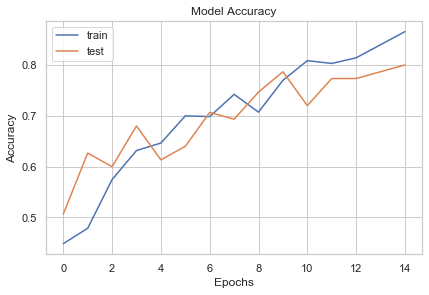

In [16]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()